In [1]:
# importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy
import json
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [2]:
# function to create density maps for images
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1] + distances[i][2] + distances[i][3]) * 0.1
        else:
            sigma = np.average(np.array(gt.shape)) / 2. / 2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')

    return density

In [3]:
# Set the root to the Shanghai dataset
root = os.path.join(os.getcwd(), '..', 'dataset')
print(root)

/home/fiky/Desktop/test/people_counter/training/../dataset


In [4]:
# Generate the ShanghaiA's ground truth
part_A_train = os.path.join(root, 'part_A_final', 'train_data', 'images')
part_A_test = os.path.join(root, 'part_A_final', 'test_data', 'images')
part_B_train = os.path.join(root, 'part_B_final', 'train_data', 'images')
part_B_test = os.path.join(root, 'part_B_final', 'test_data', 'images')
path_sets = [part_A_train, part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [12]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground_truth').replace('IMG_', 'GT_IMG_'))
    img = plt.imread(img_path)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg', '.h5').replace('images', 'ground_truth'), 'w') as hf:
            hf['density'] = k

/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_224.jpg
(619, 1024)
generate density...


/tmp/ipykernel_12436/1303342888.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_214.jpg
(359, 329)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_4.jpg
(746, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_168.jpg
(944, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_245.jpg
(825, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_59.jpg
(686, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_271.jpg
(438, 736)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_261.jpg
(359, 478)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_A_final/train_data/images/IMG_53.jpg
(662, 962)
gene

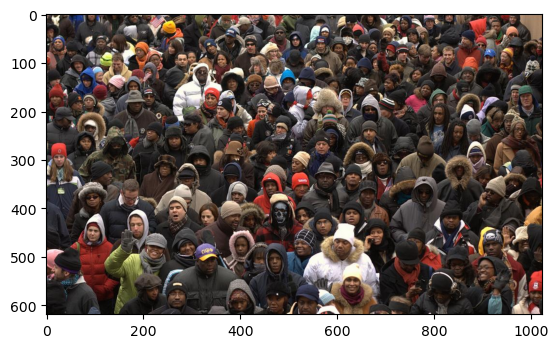

In [6]:
#now see a sample from ShanghaiA
plt.imshow(Image.open(img_paths[0]))

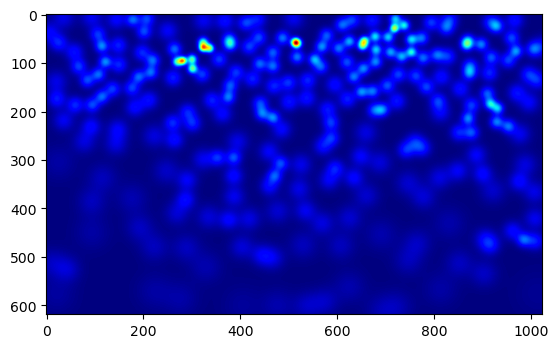

In [7]:
gt_file = h5py.File(img_paths[0].replace('.jpg', '.h5').replace('images', 'ground_truth'), 'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth, cmap=CM.jet)

In [8]:
np.sum(groundtruth)# don't mind this slight variation

np.float32(238.92505)

In [16]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train, part_B_test]

img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

# creating density map for part_b images
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg', '.mat').replace('images', 'ground_truth').replace('IMG_', 'GT_IMG_'))
    img = plt.imread(img_path)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]

    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg', '.h5').replace('images', 'ground_truth'), 'w') as hf:
            hf['density'] = k

/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_224.jpg
(768, 1024)
generate density...


/tmp/ipykernel_12436/1303342888.py:24: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')


done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_339.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_214.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_4.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_168.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_245.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_59.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_372.jpg
(768, 1024)
generate density...
done.
/home/fiky/Desktop/test/people_counter/dataset/part_B_final/train_data/images/IMG_312.jpg
(768, 1024)